In [1]:
import os
import PIL
import cv2
import numpy as np
import pydicom
import pandas as pd
from glob import glob
import nibabel as nib
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

import tar_nii_extraction




... IMAGE ID=00376 **MGMT=0** ...       [SHOWING SLICE/SCAN 80] 


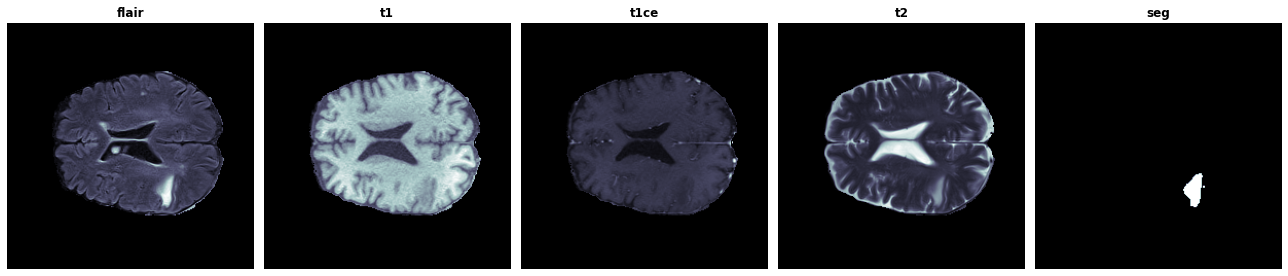

In [2]:
# Load Competition Training Dataframe
train_df = pd.read_csv("./train_labels.csv")

def visualizer(img_ids, scan_slice, train_df=train_df):
    for img_id in img_ids:
        print(f"\n\n\n... IMAGE ID={img_id} **MGMT={train_df[train_df['BraTS21ID']==int(img_id)].MGMT_value.values[0]}** ...       [SHOWING SLICE/SCAN {scan_slice}] ")
        plt.figure(figsize=(18, 5))

        for i, nii in enumerate([f'../project_data/BraTS2021_{img_id}/BraTS2021_{img_id}_{s_type}.nii.gz' for s_type in ["flair", "t1", "t1ce", "t2", "seg"]]):
            # PLOTTING
            plt.subplot(1,5,i+1)
            image = nib.load(nii).get_fdata()
            plt.title(nii.rsplit("_", 1)[1].split(".", 1)[0], fontweight="bold")
            plt.axis(False)
            plt.imshow(image[:, :, scan_slice], cmap="bone")

        plt.tight_layout()    
        plt.show()
        
file_found = False
while not file_found:
    try:
        visualizer(["00376"], 80)
        file_found = True
    except FileNotFoundError:
        tar_nii_extraction.load_data()

In [3]:
img_ids = ["00376", "00789", "00441", "00703", "00807", "00523", "00241", "00778",]
SCAN_NUM = 83